# Baseball Project

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"
df = pd.read_csv(url)

# Explore the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about the dataset, including data types and missing values
print(df.describe())  # Display summary statistics

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  

<AxesSubplot:>

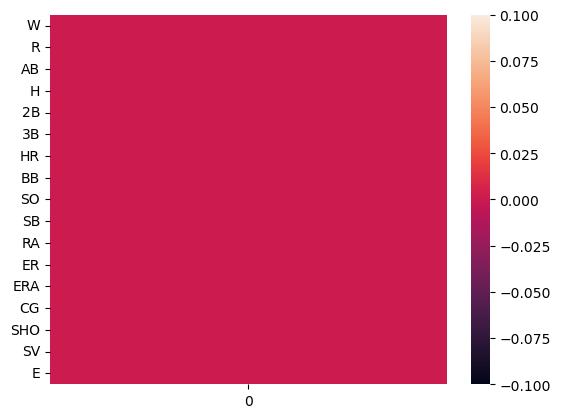

In [2]:
sns.heatmap(df.isnull().sum().to_frame())

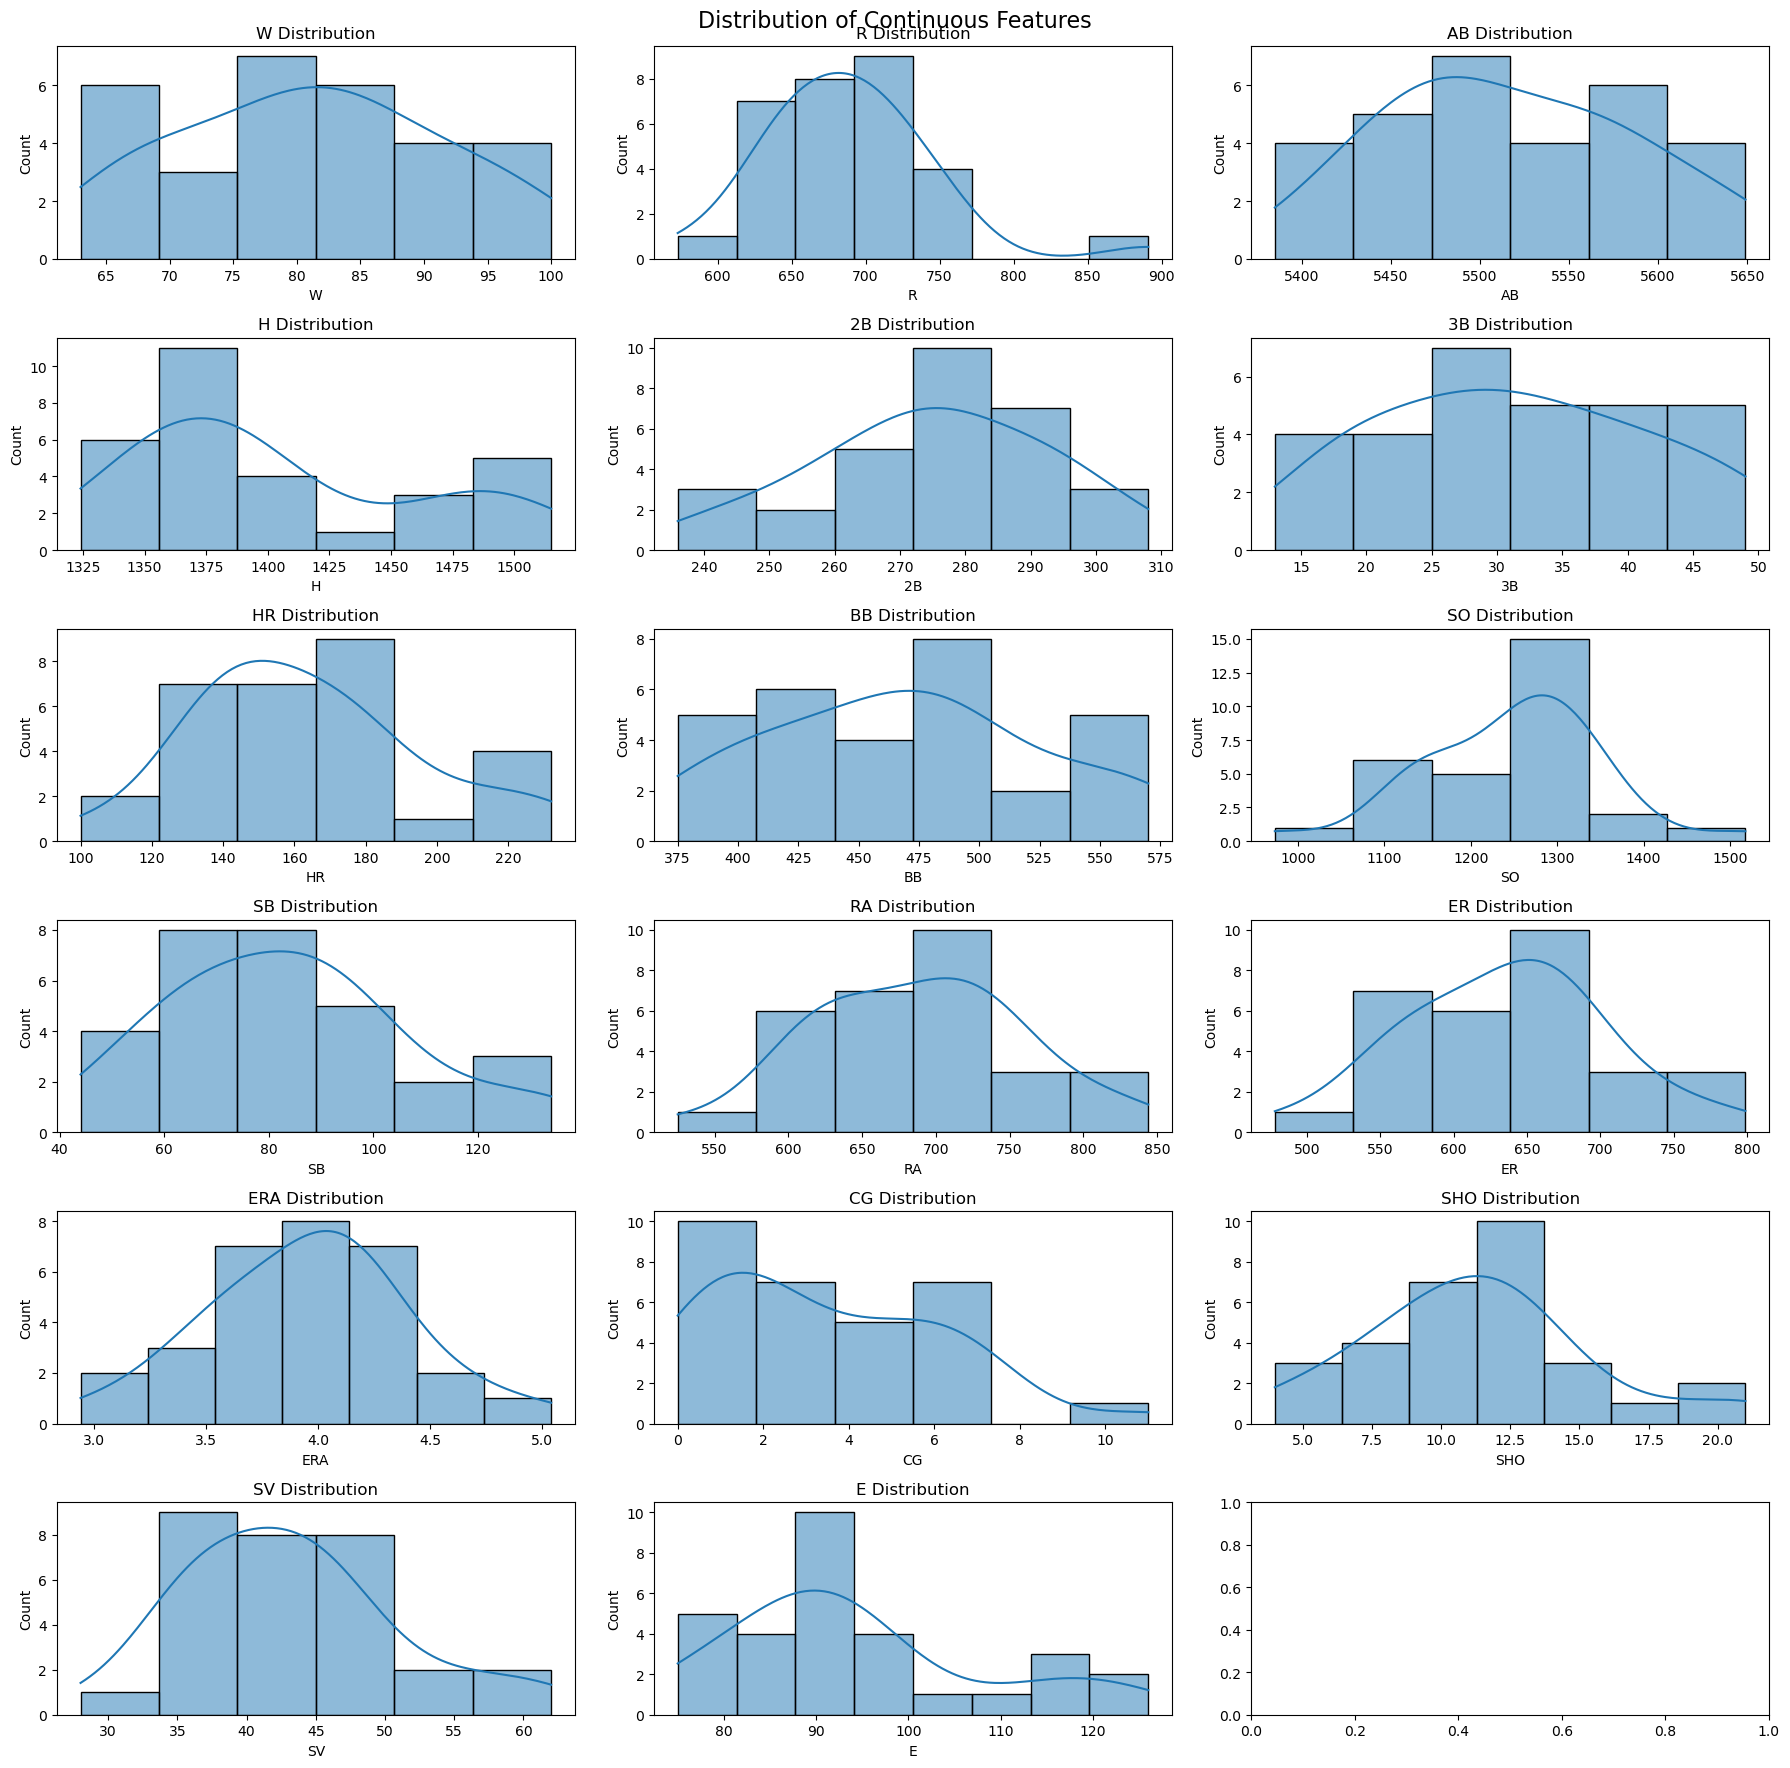

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv'
df = pd.read_csv(url)

# List of continuous features to visualize
continuous_features = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

# Create subplots for each feature
fig, axes = plt.subplots(6, 3, figsize=(18, 18))
fig.suptitle('Distribution of Continuous Features', fontsize=16)

for i, feature in enumerate(continuous_features):
    row, col = i // 3, i % 3
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)

plt.tight_layout()
plt.show()

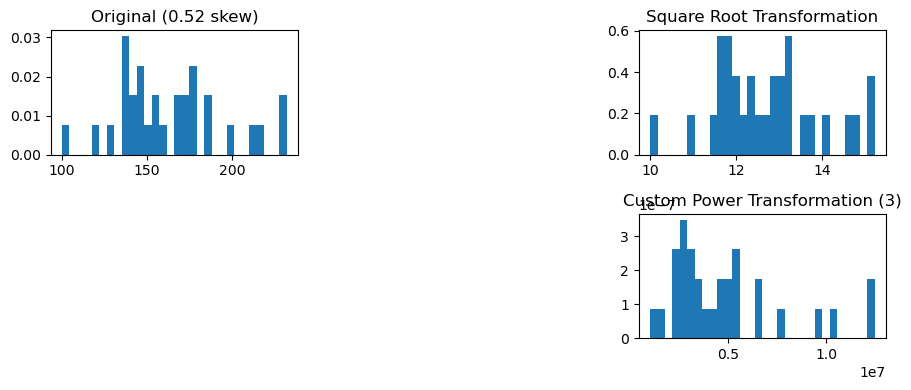

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv"
df = pd.read_csv(url)

# Choose a continuous feature for transformation (e.g., 'HR' for demonstration)
feature = 'HR'

# Check the skewness of the feature
skewness = df[feature].skew()

# Plot the original feature
plt.figure(figsize=(12, 4))

plt.subplot(2, 4, 1)
plt.hist(df[feature], bins=30, density=True)
plt.title(f'Original ({skewness:.2f} skew)')

# Log transformation
if skewness > 1:
    log_transformed = np.log(df[feature] + 1)  # Adding 1 to avoid issues with zero or negative values
    plt.subplot(2, 4, 2)
    plt.hist(log_transformed, bins=30, density=True)
    plt.title('Log Transformation')

# Square root transformation
if 0.5 < skewness <= 1:
    sqrt_transformed = np.sqrt(df[feature])
    plt.subplot(2, 4, 3)
    plt.hist(sqrt_transformed, bins=30, density=True)
    plt.title('Square Root Transformation')

# Cube root transformation
if -0.5 <= skewness < 0.5:
    cube_root_transformed = np.cbrt(df[feature])
    plt.subplot(2, 4, 4)
    plt.hist(cube_root_transformed, bins=30, density=True)
    plt.title('Cube Root Transformation')

# Reciprocal transformation
if -1 <= skewness < -0.5:
    reciprocal_transformed = 1 / (df[feature] + 1)  # Adding 1 to avoid division by zero
    plt.subplot(2, 4, 5)
    plt.hist(reciprocal_transformed, bins=30, density=True)
    plt.title('Reciprocal Transformation')

# Box-Cox transformation
if skewness < -1:
    boxcox_transformed, _ = stats.boxcox(df[feature] + 1)  # Adding 1 to avoid issues with zero or negative values
    plt.subplot(2, 4, 6)
    plt.hist(boxcox_transformed, bins=30, density=True)
    plt.title('Box-Cox Transformation')

# Power transformation (custom exponent, e.g., 3)
custom_power_transformed = np.power(df[feature], 3)
plt.subplot(2, 4, 7)
plt.hist(custom_power_transformed, bins=30, density=True)
plt.title('Custom Power Transformation (3)')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from the URL
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv"
df = pd.read_csv(url)

# Select the columns you want to normalize (e.g., 'W', 'R', 'H', etc.)
columns_to_normalize = ['W', 'R', 'H']  # Add more columns if needed

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized dataset
print(df.head())

          W         R    AB         H   2B  3B   HR   BB    SO   SB   RA   ER  \
0  0.864865  0.474843  5575  0.905759  300  42  139  383   973  104  641  601   
1  0.540541  0.386792  5467  0.130890  277  44  156  439  1264   70  700  653   
2  0.486486  0.301887  5439  0.371728  303  29  141  533  1157   86  640  584   
3  0.351351  0.154088  5533  0.298429  260  27  136  404  1231   68  701  643   
4  0.297297  0.364780  5605  1.000000  289  49  151  455  1259   83  803  746   

    ERA  CG  SHO  SV    E  
0  3.73   2    8  56   88  
1  4.07   2   12  45   86  
2  3.67  11   10  38   79  
3  3.98   7    9  37  101  
4  4.64   7   12  35   86  


In [6]:
import pandas as pd

# Load the dataset from the URL
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv"
df = pd.read_csv(url)

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr()

# Print the Pearson correlation coefficients
print("Pearson Correlation Coefficients:")
print(correlation_matrix)

Pearson Correlation Coefficients:
            W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.25248

In [7]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset from the URL
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv"
df = pd.read_csv(url)

# Perform a one-way ANOVA for a selected feature (e.g., 'W' and 'R' columns)
feature1 = df['W']
feature2 = df['R']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(feature1, feature2)

# Print the results
print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between groups.")

One-way ANOVA results:
F-statistic: 3105.7006953563914
P-value: 4.528793541685246e-52
Reject the null hypothesis: There is a significant difference between groups.


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset from the URL
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv"
df = pd.read_csv(url)

# Define the features (X) and target variable (y)
X = df[['R', 'H', '2B', '3B', 'HR']]
y = df['W']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared (R2) score:", r2)

R-squared (R2) score: -0.3549295717888632


In [9]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"
data = pd.read_csv(url)

# Assuming 'data' contains your dataset
# Example data loading and splitting:
x = data.drop(columns=['W'])
y = data['W']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)

# Define the parameter grid for Ridge regression
ridge_params = {'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create the GridSearchCV object
xg_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
xg_grid.fit(x_train_scaler, y_train)

# Print the best score, best parameters, and best estimator
print('Best score:', xg_grid.best_score_)
print('Best parameters:', xg_grid.best_params_)
print('Best estimator:', xg_grid.best_estimator_)

Best score: 0.8179606812659038
Best parameters: {'alpha': 3}
Best estimator: Ridge(alpha=3)


In [ ]:
# As discussed in EDA and storytelling the randomness of the dataset should be reduced by reducing the number of variables. Which was done by R-square dimension reduction.

# The Best Score is 0.8179606812659038 and the R-square value is -0.3549295717888632

# <u>Avocado Dataset Analysis and ML Prediction</u>

<a id=section1></a>

### * Problem Statement

- The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __(EDA)__ for analysis purpose.

- In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).

<ul>The variables of the dataset are the following:</ul>

* Categorical: ‘region’,’type’
* Date: ‘Date’
* Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
* Target:‘AveragePrice’


<a id=section2></a>

### * Data Loading and Description

- This data was downloaded and provided by INSAID, from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
- Represents weekly 2018 retail scan data for National retail volume (units) and price.
- The dataset comprises of __18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

- The unclear numerical variables terminology is explained in the next section:

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘Unamed: 0’</td><td>Its just a useless index feature that will be removed later</td></tr>
<tr><td>‘Total Volume’</td><td>Total sales volume of avocados</td></tr>
<tr><td>‘4046’</td><td>Total sales volume of  Small/Medium Hass Avocado</td></tr>
<tr><td>‘4225’</td><td>Total sales volume of Large Hass Avocado</td></tr>
<tr><td>‘4770’</td><td>Total sales volume of Extra Large Hass Avocado</td></tr>
<tr><td>‘Total Bags’</td><td>Total number of Bags sold</td></tr>
<tr><td>‘Small Bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘Large Bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘XLarge Bags’</td><td>Total number of XLarge Bags sold</td></tr>
</table>

### * Importing packages

In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", warn=False)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

- Read in the Avocado Prices csv file as a DataFrame called df

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

<a id=section3></a>

### * Data Profiling

<a id=section4></a>

### * Understanding the Avocado Dataset

- Lets check our data shape:
- __Dataset__  has __18249 rows__ and __14 columns.__

In [3]:
df.shape

(18249, 14)

In [4]:
df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

In [6]:
df.tail()  # This will print the last n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- Well as a first observation we can see that we are lucky, we dont have any missing values (__18249__ complete data) and __13 columns__. Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [8]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- We can see all columns having count __18249__. Looks like it doesn't contain missing values

In [9]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- We can see that __no missing values__ exist in dataset, that's great!

<a id=section5></a>

### * Profiling

In [10]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="avocado_before_preprocessing.html")

- I have done Pandas Profiling before preprocessing dataset, so we can get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data. File was saved as html file __avocado_before_preprocessing.html__.

- Will take a look at the file and see what useful insight you can develop from it. <br/>

- Initial observation as a result from profiling of __Avocado Dataset__ can be seen in  __avocado_before_preprocessing.html__
![title](warning.png)

<a id=section6></a>

### * Preprocessing

- The Feature __"Unnamed:0"__ is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

- Lets check our data head again to make sure that the Feature __Unnamed:0 is removed__

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [13]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

- Lets check the head to see what we have done:

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<a id=section7></a>


### * Data Visualisation and Questions answered

__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

<a id=section8></a>

- __Q.1 Which type of Avocados are more in demand (Conventional or Organic)?__

In [15]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

- Just over __2% of our dataset is organic__. So looks like __Conventional is in more demand__. Now, let's look at the average price distribution

<a id=section9></a>

- __Q.2 In which range Average price lies, what is distribution look like?__

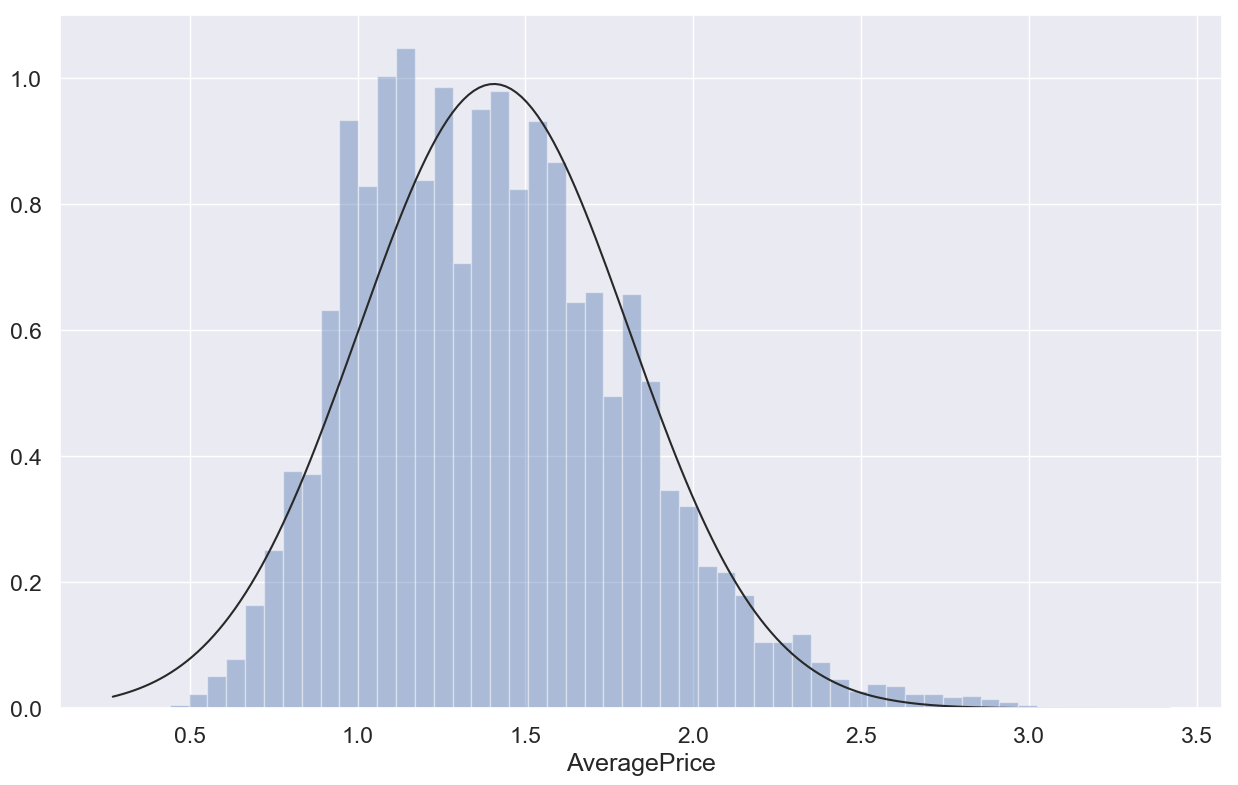

In [16]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

- Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.4.__

- Let's look at average price of conventional vs. organic. 

<a id=section10></a>

- __Q.3 How Average price is distributed over the months for Conventional and Organic Types?__

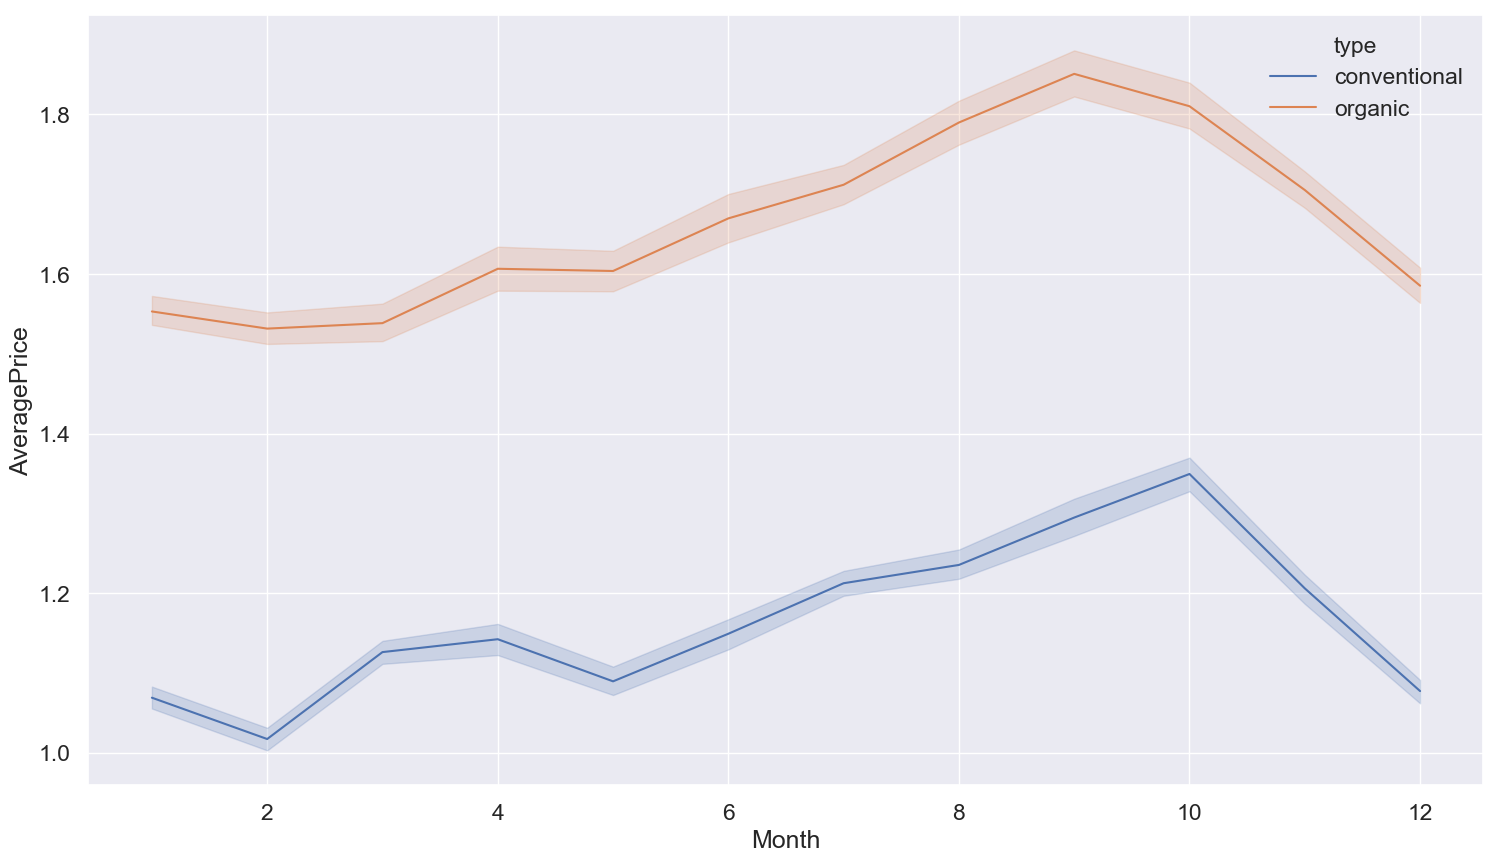

In [17]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

- Looks like there was a __hike between months 8 – 10 for both Conventional and Organic type__ of Avocados prices

###  * Now lets plot Average price distribution based on region 

<a id=section11></a>

- __Q.4 What are TOP 5 regions where Average price are very high?__

Text(0.5,1,'Average Price of Avocado According to Region')

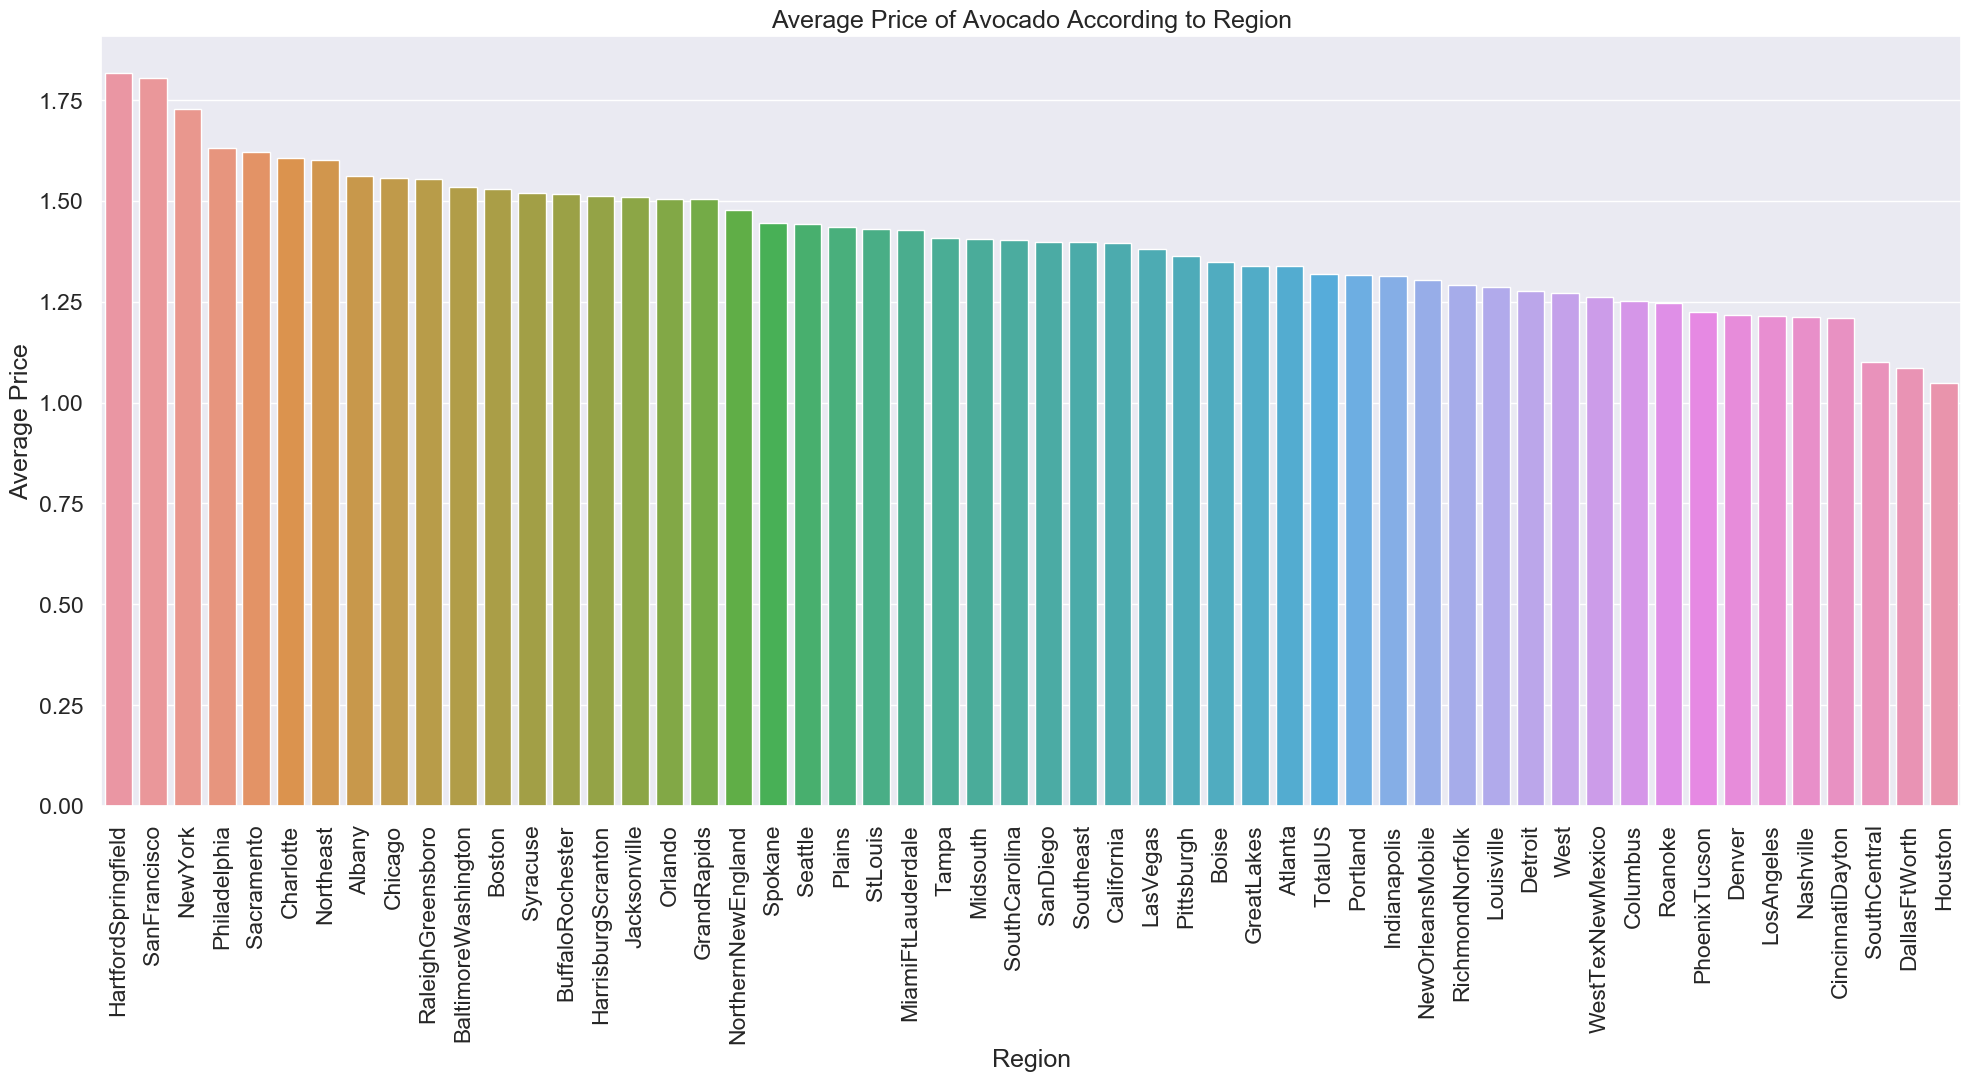

In [18]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- <ul>Looks like these region are where price is very high
<ul><b><li>HartfordSpringfield</li>
<li>SanFrancisco</li>
<li>NewYork</li>
<li>Philadelphia</li>
    <li>Sacramento</li></b></ul></ul>

<a id=section12></a>

- __Q.5 What are TOP 5 regions where Average consumption is very high?__

Text(0.5,1,'Average of Total Volume According to Region')

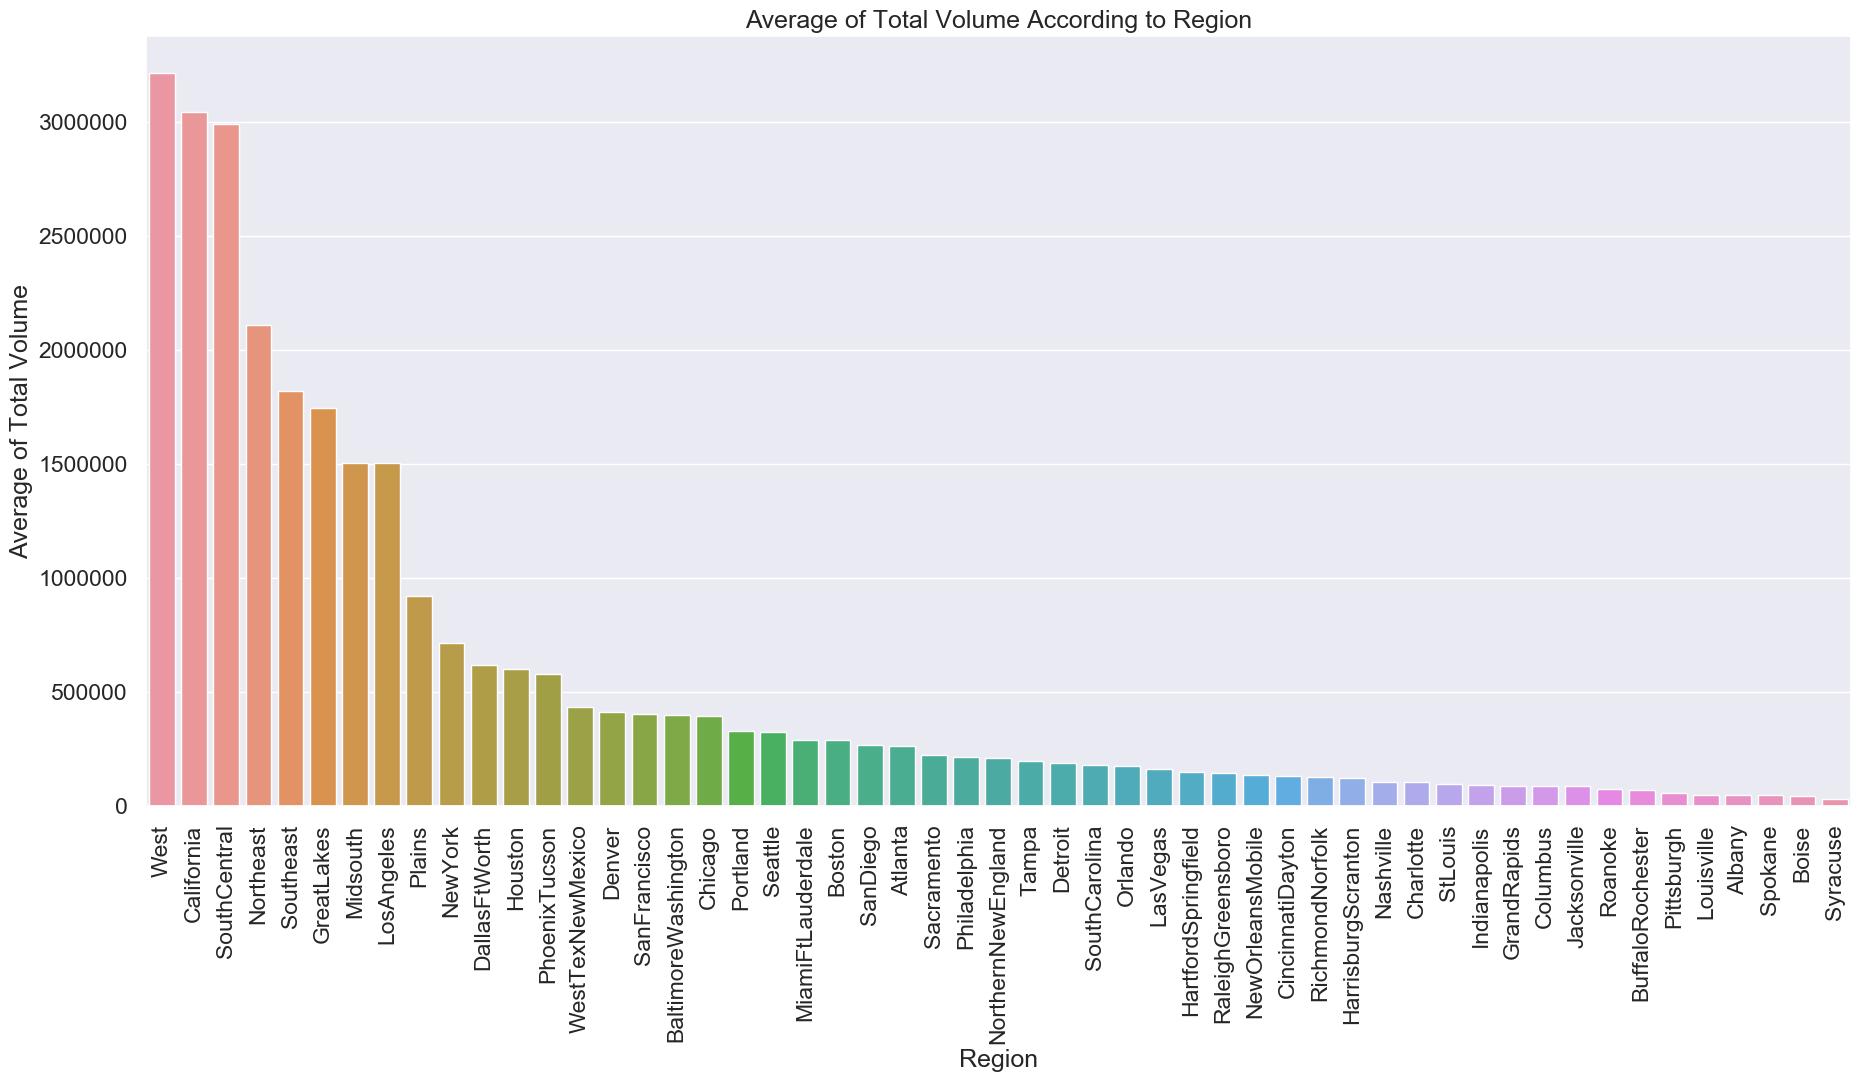

In [19]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- <ul>Looks like these region are where Consumption is very high
<ul><b><li>West</li>
<li>California</li>
<li>SouthCentral</li>
<li>Northeast</li>
    <li>Southeast</li></b></ul></ul>

<a id=section13></a>

- __Q.6 In which year and for which region was the Average price the highest?__

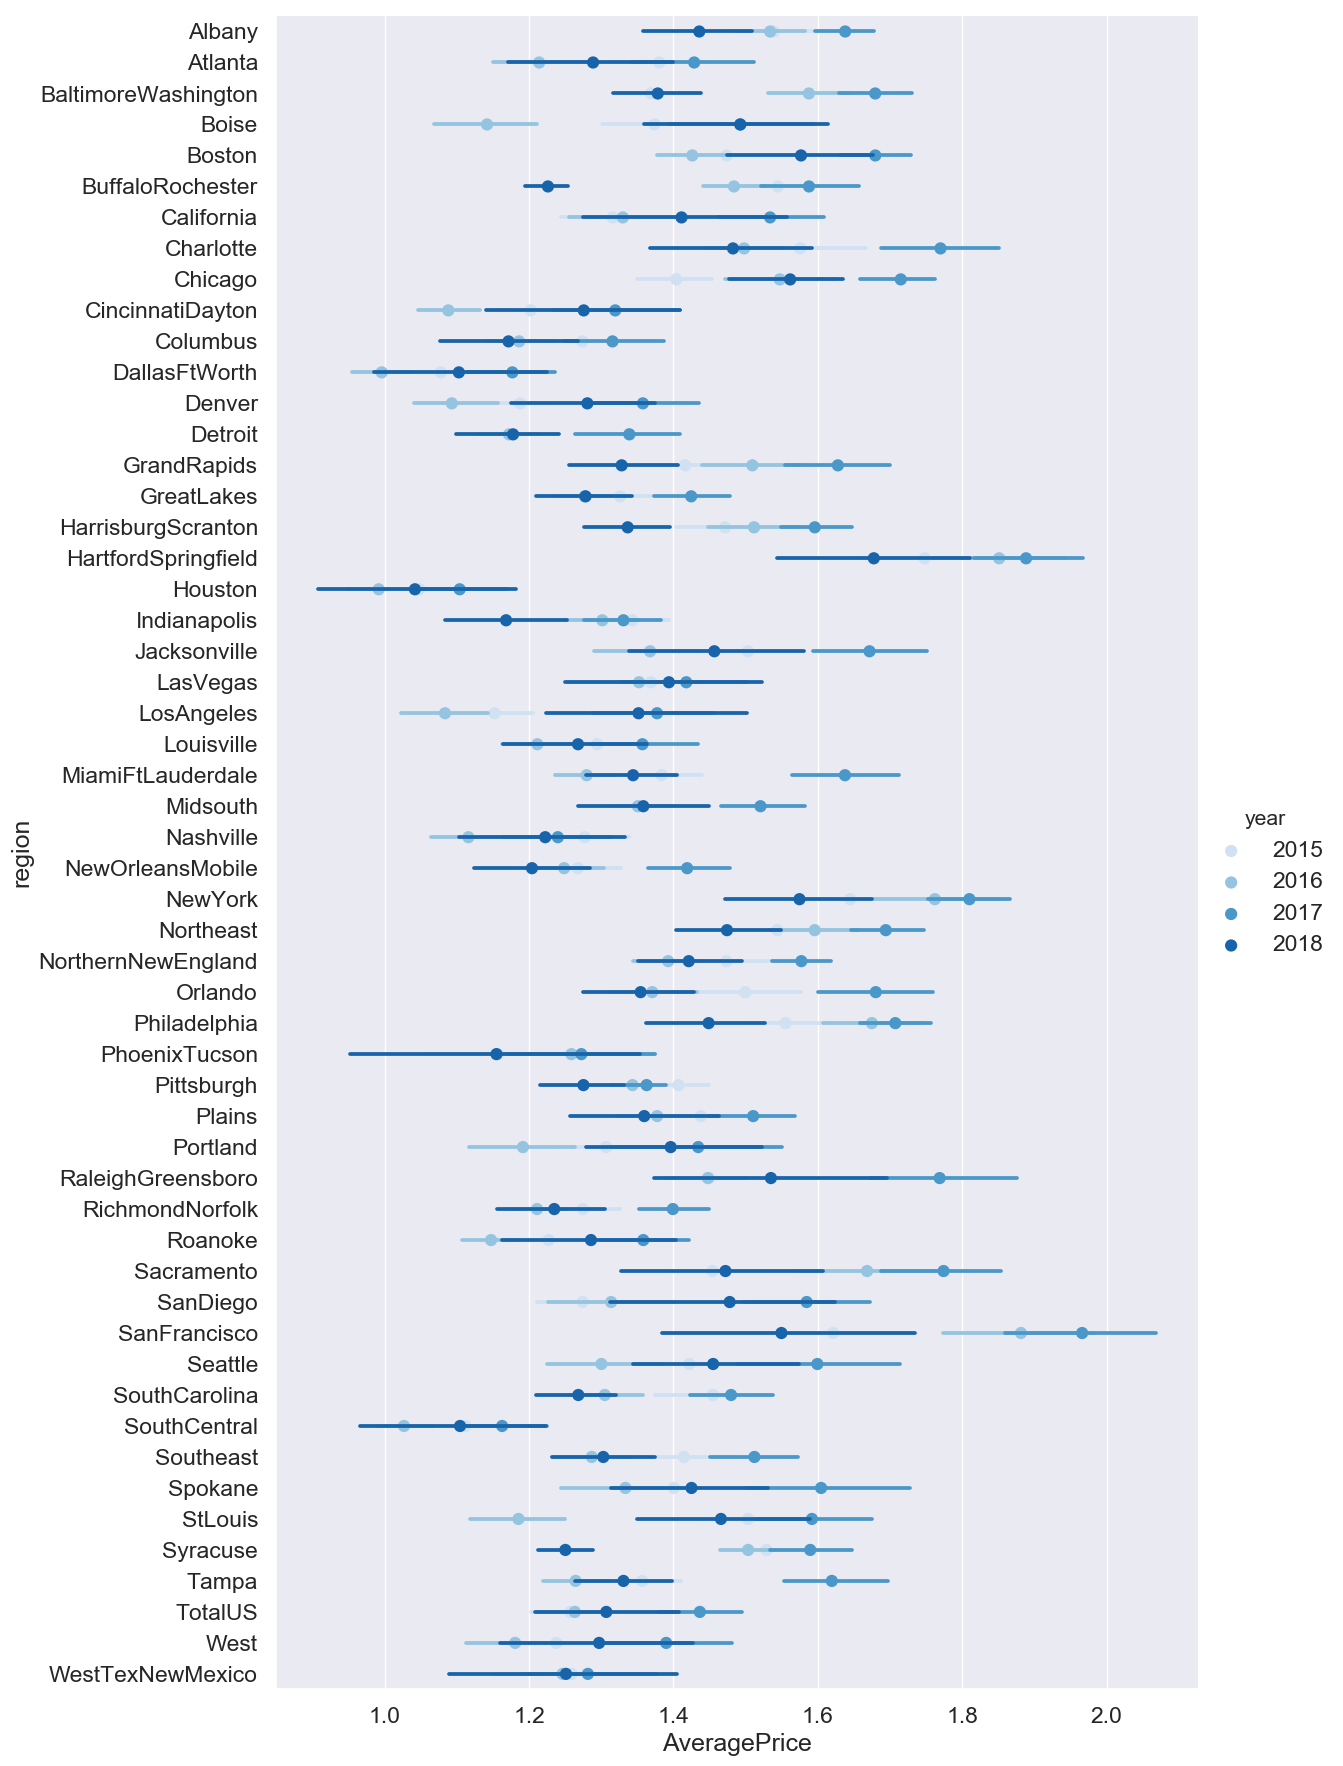

In [20]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

- Looks like there was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. If you'll search it on google, you'll find the same.__

<a id=section14></a>

- __Q.7 How price is distributed over the date column?__

- Now lets do some plots!! I'll start by plotting the Avocado's Average Price  through the Date column

Text(0.5,1,'Average Price')

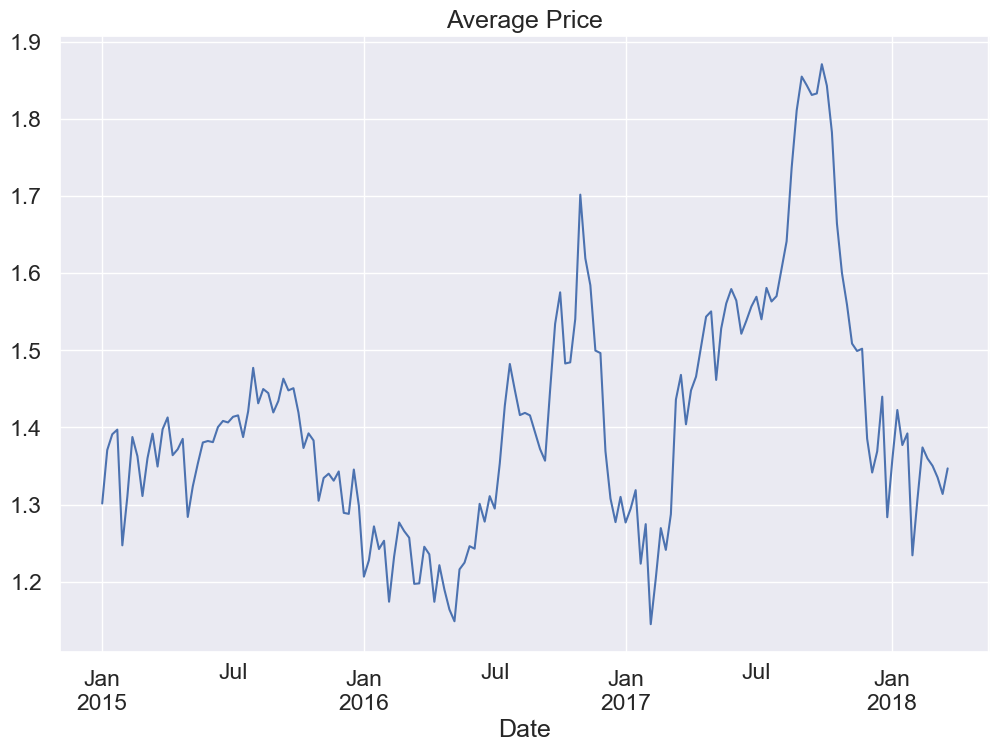

In [21]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- This also shows there was a huge hike in prices after __July 2017 and before Jan 2018__. This was also confirmed in earlier graph too.
- Cool right? now lets have an idea about the relationship between our Features(Correlation)

<a id=section15></a>

- __Q.8 How dataset features are correlated with each other?__

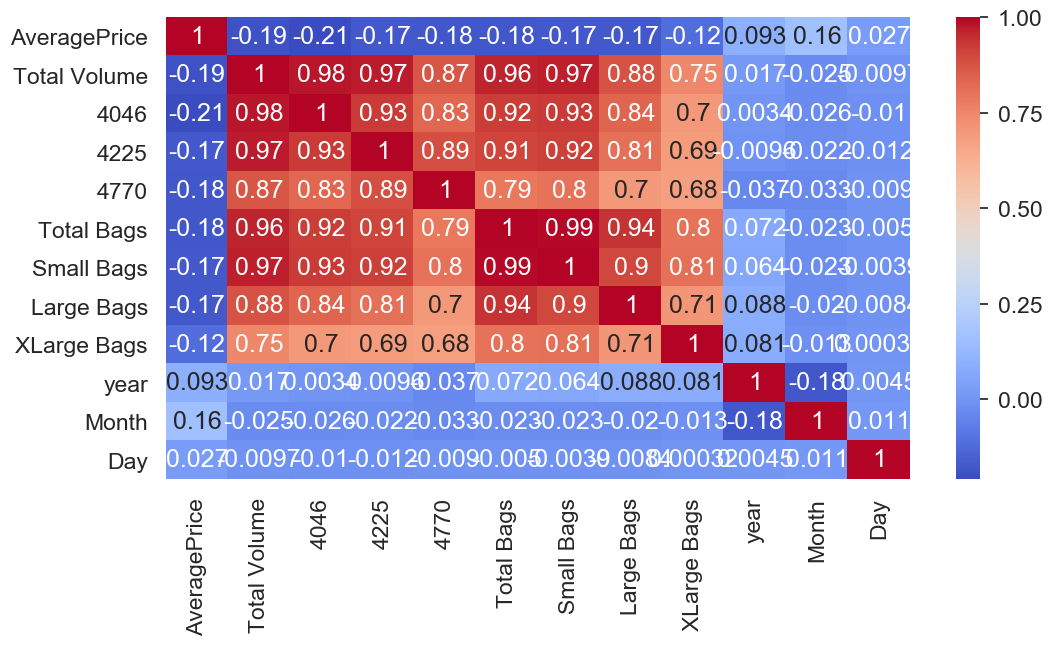

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

- As we can from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

- First we have to do some Feature Engineering on the __categorical Features : region and type__

<a id=section16></a>

## * Feature Engineering for Model building

In [23]:
df['region'].nunique()

54

In [24]:
df['type'].nunique()

2

- As we can see we have __54 regions__ and __2 unique types__, so it's going to be easy to to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

- I will drop the Date Feature as well because I already have __3 other columns for the Year, Month and Day__.

In [25]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [26]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [27]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


<a id=section17></a>

## * Model selection/predictions

- Now our data are ready! lets apply our model which is going to be the __Linear Regression because our Target variable 'AveragePrice' is continuous__.
- Let's now begin to train out regression model! We will need to first split up our data into an __X array that contains the features to train on__, and a __y array with the target variable__.

<a id=section18></a>

- __P.1 Are we good with Linear Regression? Lets find out.__

In [28]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

 - Creating and Training the Model

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23297133291665678
MSE: 0.09108802805350158
RMSE: 0.3018079323899582


- The __RMSE is low so we can say that we do have a good model, but lets check to be more sure__.
- Lets plot the __y_test vs the predictions__

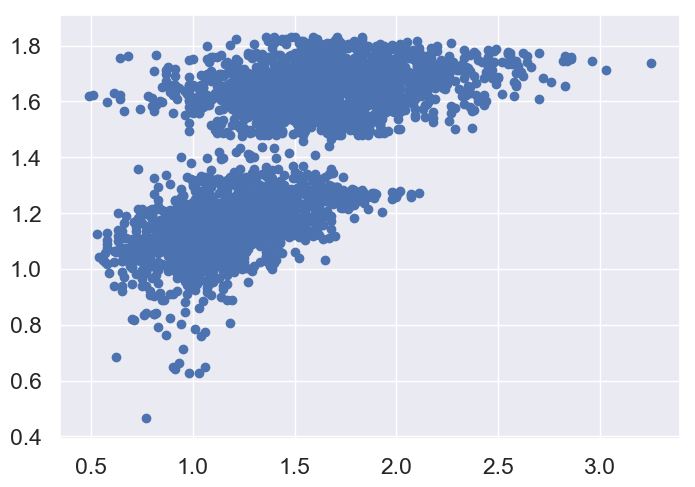

In [31]:
plt.scatter(x=y_test,y=pred)

- As we can see that __we don't have a straight line so I am not sure that this is the best model we can apply on our data__

- Lets try working with the  __Decision Tree Regression model__

<a id=section19></a>

- __P.2 Are we good with Decision Tree Regression? Lets find out.__

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0,0.5,'Predicted Y')

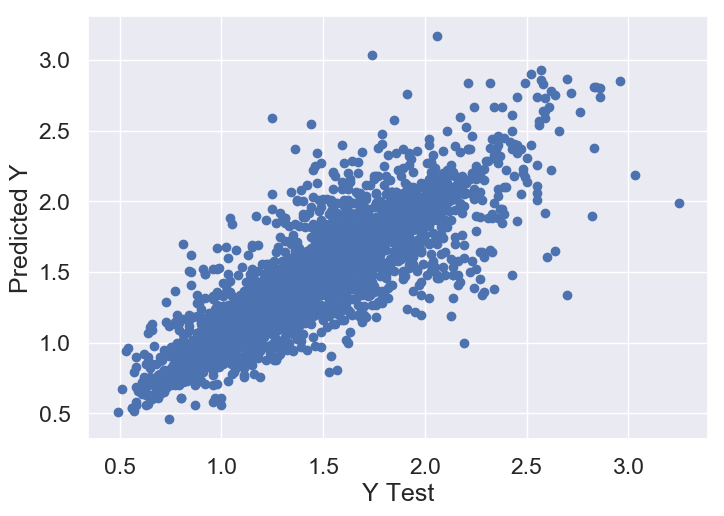

In [33]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- Nice, here we can see that __we nearly have a straight line__, in other words __its better than the Linear regression model, and to be more sure lets check the RMSE__

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13404109589041097
MSE: 0.04273295890410959
RMSE: 0.2067195174726121


- Very Nice, our __RMSE is lower than the previous one we got with Linear Regression__. Now I am going to try one last model to see if I can __improve my predictions for this data which is the RandomForestRegressor__

<a id=section20></a>

- __P.3 Are we good with Random Forest Regressor? Lets find out.__

In [35]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10715068493150685
MSE: 0.023817860821917808
RMSE: 0.15433036260541153


- Well as we can see the __RMSE is lower than the two previous models__, so the __RandomForest Regressor is the best model in this case.__

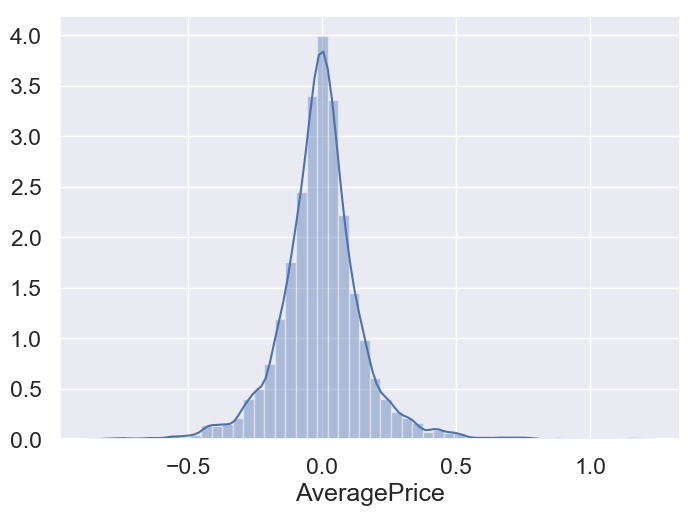

In [37]:
sns.distplot((y_test-pred),bins=50)

- Notice here that our __residuals looked to be normally distributed__ and that's really a __good sign which means that our model was a correct choice for the data.__ 

<a id=section21></a>

- __Lets see final Actual Vs Predicted sample.__

,Y Test,Pred
8604,0.82,0.993
2608,0.97,0.998
14581,1.44,1.344
4254,0.97,0.894
16588,1.45,1.451


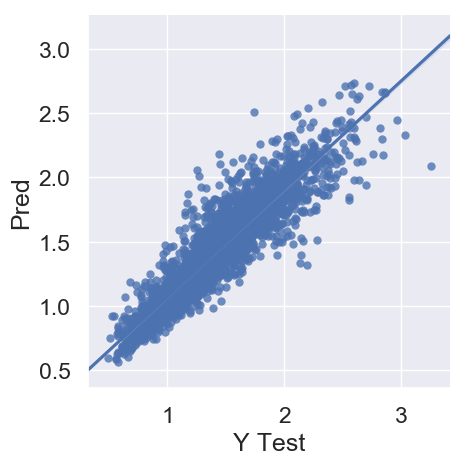

In [38]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

<a id=section22></a>

## * Conclusions

- With the help of notebook I learnt how __EDA__ can be carried out using __Pandas and other plotting libraries__.
- Also I have seen making use of packages like __matplotlib, plotly and seaborn__ to develop better insights about the data.<br/>
- I have also seen how __preproceesing__ helps in dealing with __missing values and irregualities__ present in the data. I also learnt __how to create new features__ which will in turn help us to better predict the survival. 
- I also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- I have seen the impact of columns like __type, year/date__ on the __Average price increase/decrease rate__.
- The most important inference drawn from all this analysis is, I get to know what are the __features on which price is highly positively and negatively coorelated with.__ 
- I came to know through analysis which model will be work with better accuracy with the help of __low residual and RMSE scores__.
- This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know __where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions__.

# IBM HR Analytics Employee Attrition & Performance

In [10]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import random as rn
from functools import reduce 

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [13]:
# Read the file
df = pd.read_csv('C:/Users/tamim/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [14]:
# Shape of data
df.shape

(1470, 35)

In [15]:
# Data Types of Columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [16]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36 

# Inspect the structure of the dataframe
df.sample(5).transpose()

,70,1411,1444,491,169
Age,59,25,56,43,32
Attrition,No,No,Yes,No,No
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1225,309,310,1001,120
Department,Sales,Human Resources,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,2,7,9,6
Education,1,3,2,5,5
EducationField,Life Sciences,Human Resources,Technical Degree,Medical,Life Sciences
EmployeeCount,1,1,1,1,1
EmployeeNumber,91,1987,2032,663,231


In [17]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [18]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [19]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [23]:
#Inspect the state of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [25]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

In [26]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [27]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum()

0

In [28]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [29]:
# Check for duplicate observations
df.duplicated().sum()

0

In [30]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [31]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [32]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [33]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [34]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

In [36]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [37]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

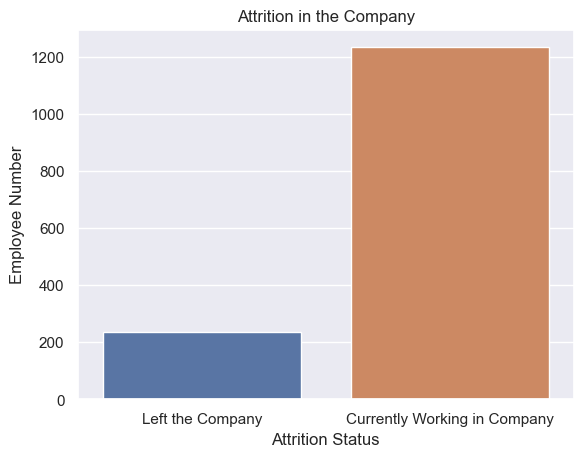

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [38]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
trgt.value_counts()

In [39]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [40]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

In [41]:
# Labeling age groups
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)

In [42]:
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


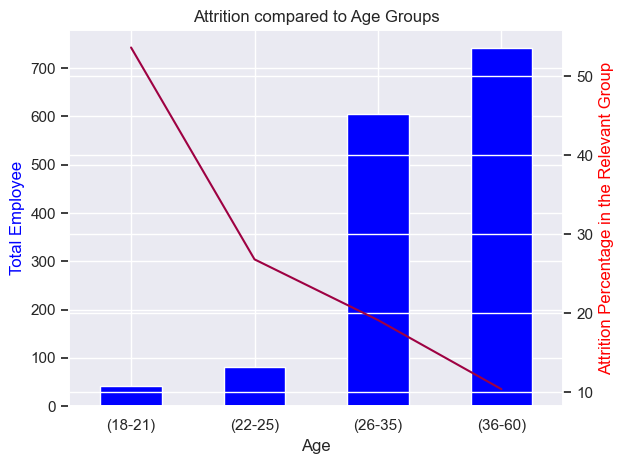

In [43]:
# Attrition Compared to Age Group Graph
graph_df(x = 'Age')

In [44]:
# Business Travel & Attrition Table
table_df(x = 'BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


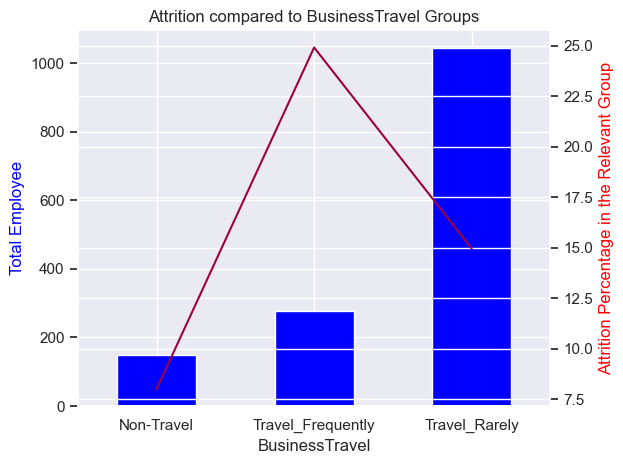

In [45]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

In [46]:
# Department & Attrition Table
table_df(x = 'Department')

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


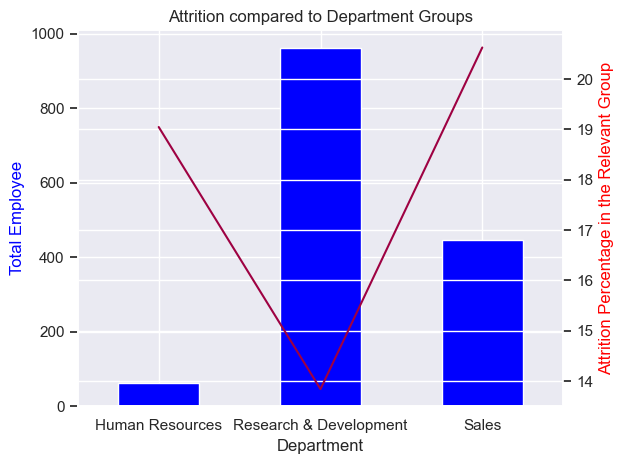

In [47]:
# Attrition compared to Department Graph
graph_df(x = 'Department')

In [48]:
# Labeling Distance From Home Groups
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHome'] = pd.cut(df2['DistanceFromHome'], bins, labels = group_names)

In [49]:
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


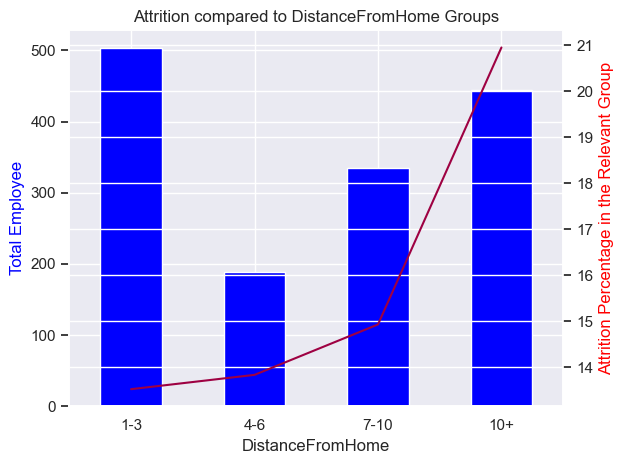

In [50]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

In [51]:
# Labeling education levels
table_df(x = 'Education')
df2['Education'] = df2['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})

In [52]:
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


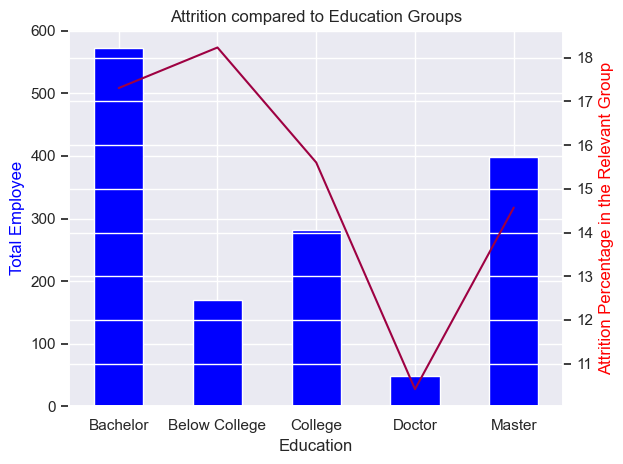

In [54]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')

In [55]:
# Education Field & Attrition Table
table_df(x = 'EducationField')

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


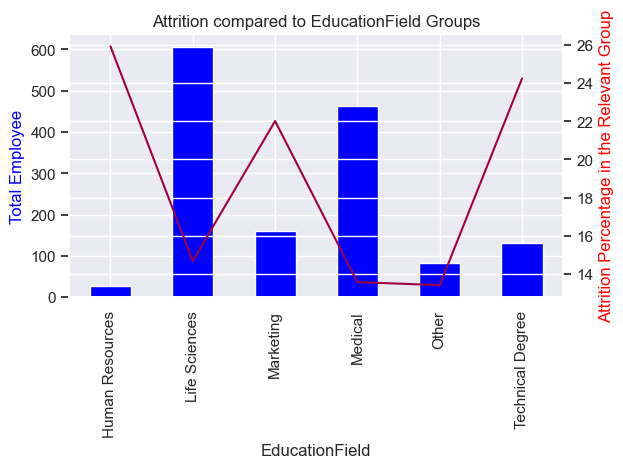

In [56]:
# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

In [57]:
# Labeling environment satisfaction
table_df(x = 'EnvironmentSatisfaction')
df2['EnvironmentSatisfaction'] = df2['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})

In [58]:
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,453,62,13.686534,26.160338
1,Low,284,72,25.352113,30.379747
2,Medium,287,43,14.982578,18.143460
3,Very High,446,60,13.452915,25.316456


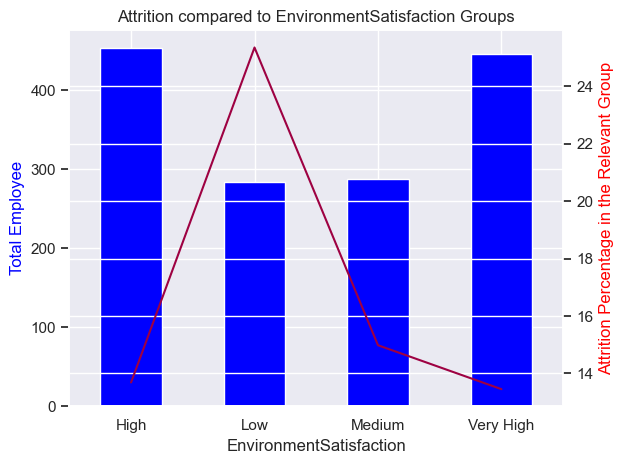

In [59]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')

In [60]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


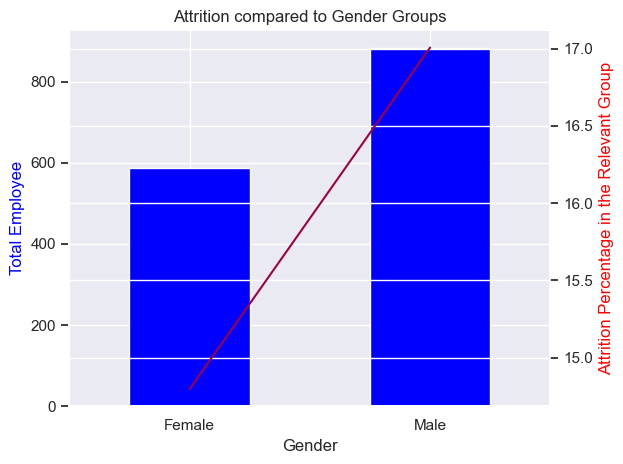

In [61]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

In [62]:
# Labeling Job Involvement Groups
table_df(x = 'JobInvolvement')
df2['JobInvolvement'] = df2['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})

In [63]:
# Job Involvement & Attrition Table
table_df(x = 'JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,868,125,14.400922,52.742616
1,Low,83,28,33.734940,11.814346
2,Medium,375,71,18.933333,29.957806
3,Very High,144,13,9.027778,5.485232


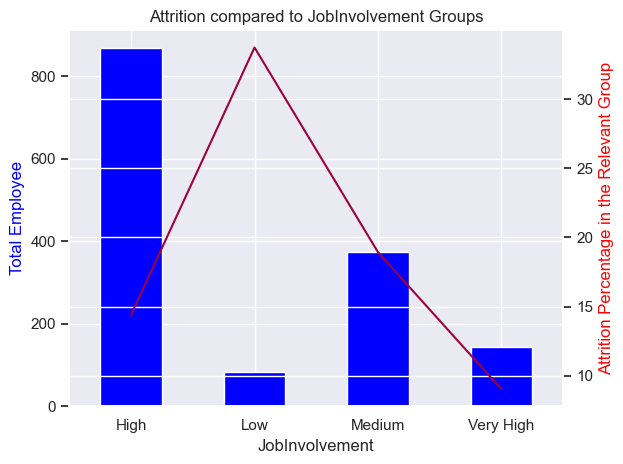

In [64]:
# Attrition compared to Job Involvement Graph
graph_df(x = 'JobInvolvement')

In [65]:
# Labeling job levels
table_df(x = 'JobLevel')
df2['JobLevel'] = df2['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

In [66]:
# Job Level & Attrition Table
table_df(x = 'JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Level-1,543,143,26.335175,60.337553
1,Level-2,534,52,9.737828,21.940928
2,Level-3,218,32,14.678899,13.502110
3,Level-4,106,5,4.716981,2.109705
4,Level-5,69,5,7.246377,2.109705


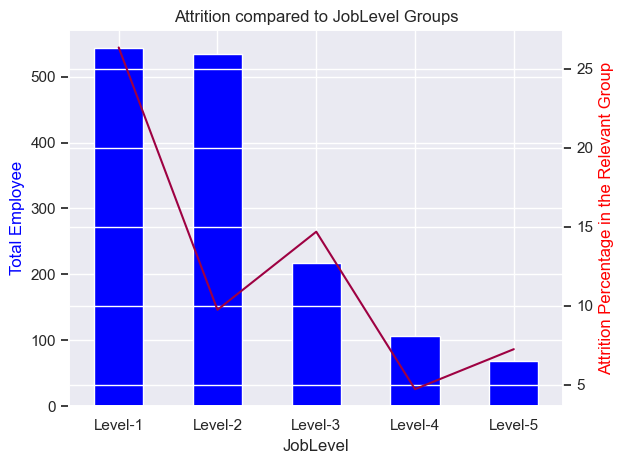

In [67]:
# Attrition compared to Job Level Graph
graph_df(x = 'JobLevel')

In [68]:
# Job Role & Attrition Table
table_df(x = 'JobRole')

,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,131,9,6.870229,3.797468
1,Human Resources,52,12,23.076923,5.063291
2,Laboratory Technician,259,62,23.938224,26.160338
3,Manager,102,5,4.901961,2.109705
4,Manufacturing Director,145,10,6.896552,4.219409
5,Research Director,80,2,2.500000,0.843882
6,Research Scientist,292,47,16.095890,19.831224
7,Sales Executive,326,57,17.484663,24.050633
8,Sales Representative,83,33,39.759036,13.924051


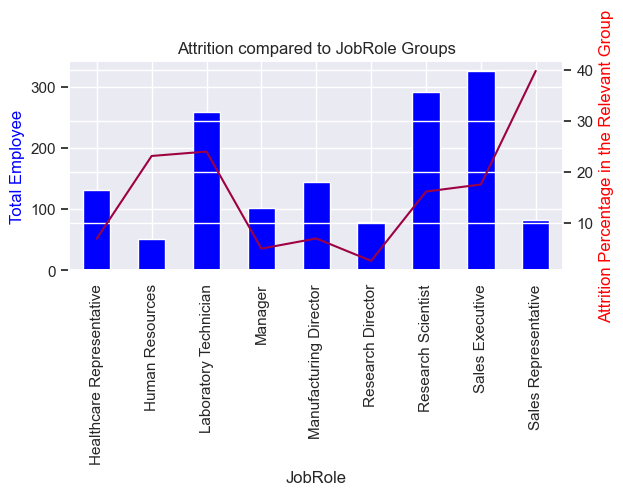

In [69]:
# Attrition compared to Job Role Graph
graph_df(x = 'JobRole', z = 90)

In [70]:
# Labeling Job Role 
table_df(x = 'JobSatisfaction')
df2['JobSatisfaction'] = df2['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'})    

In [71]:
# Job Satisfaction & Attrition Table
table_df(x = 'JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,442,73,16.515837,30.801688
1,Low,289,66,22.837370,27.848101
2,Medium,280,46,16.428571,19.409283
3,Very High,459,52,11.328976,21.940928


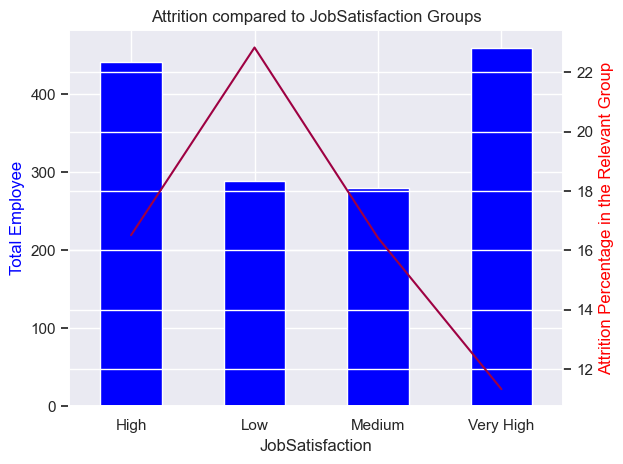

In [72]:
# Attrition compared to Job Satisfaction
graph_df(x = 'JobSatisfaction')

In [73]:
# Job Satisfaction & Attrition Table
table_df(x = 'MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


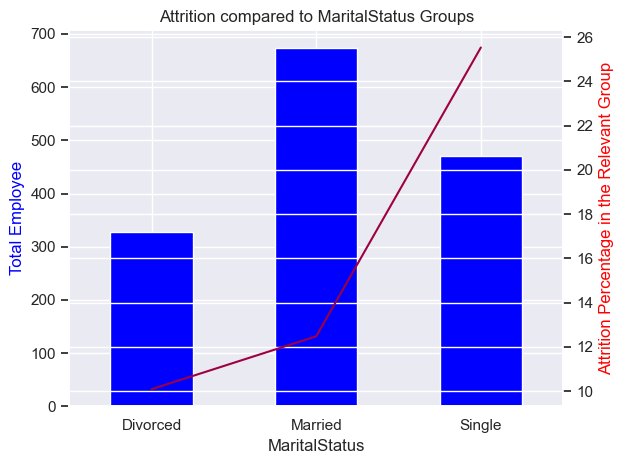

In [74]:
# Attrition compared to Job Satisfaction
graph_df(x = 'MaritalStatus')

In [75]:
# Labeling Monthly Income Level
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

In [76]:

# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


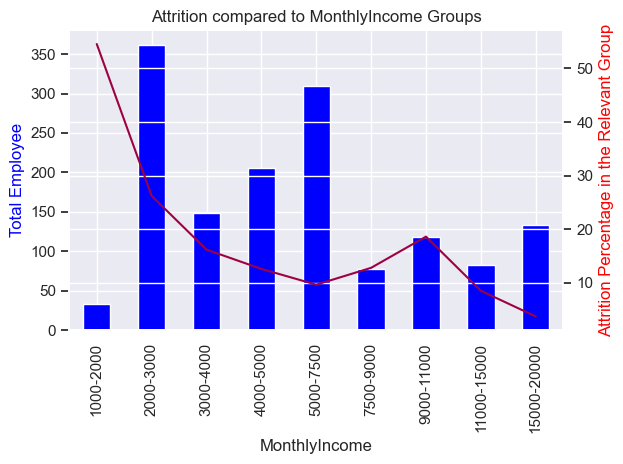

In [77]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

In [78]:
# Labeling Numbers Companied Worked Groups
table_df(x = 'NumCompaniesWorked')
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
df2['NumCompaniesWorked'] = pd.cut(df2['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [79]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,197,23,11.675127,9.704641
1,1,521,98,18.809981,41.350211
2,2,146,16,10.958904,6.751055
3,3,159,16,10.062893,6.751055
4,4,139,17,12.230216,7.172996
5,5+,308,67,21.753247,28.270042


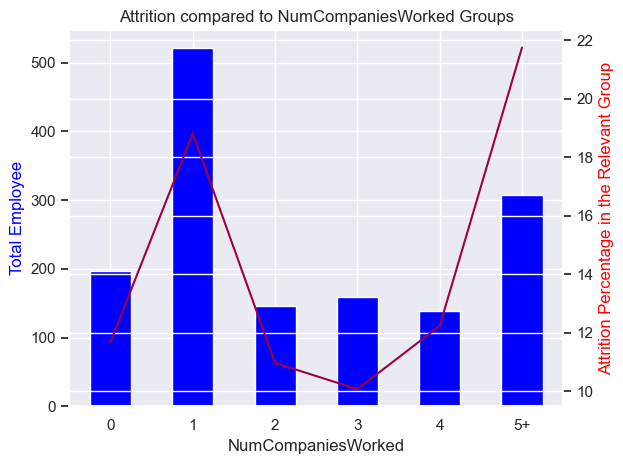

In [80]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

In [81]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


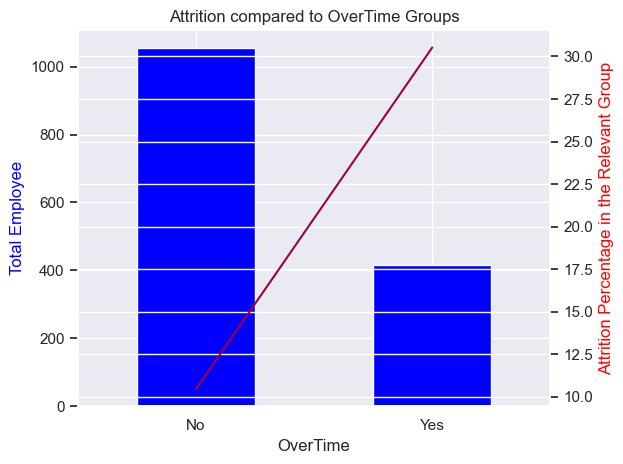

In [82]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'OverTime')

In [83]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df2['PercentSalaryHike'] = pd.cut(df2['PercentSalaryHike'], bins, labels = group_names)

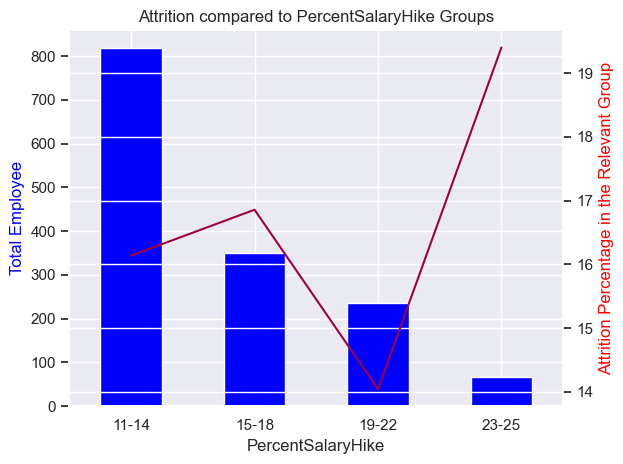

In [84]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

In [85]:
# Performance Rating & Attrition Table
table_df(x = 'PerformanceRating')

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


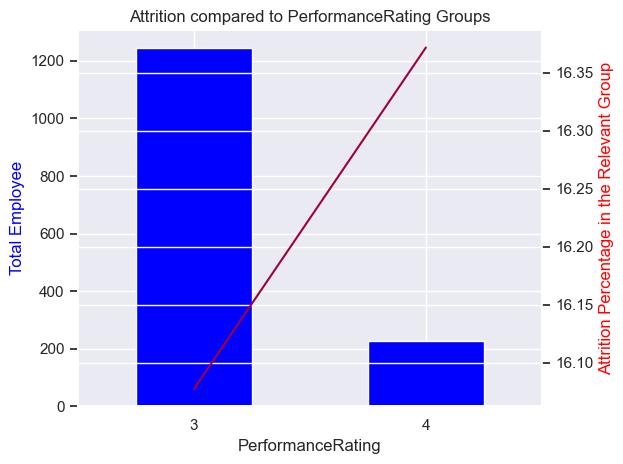

In [87]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')

In [88]:
# Labeling Relationship Satisfaction Levels
table_df(x = 'RelationshipSatisfaction')
df2['RelationshipSatisfaction'] = df2['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})

In [89]:
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


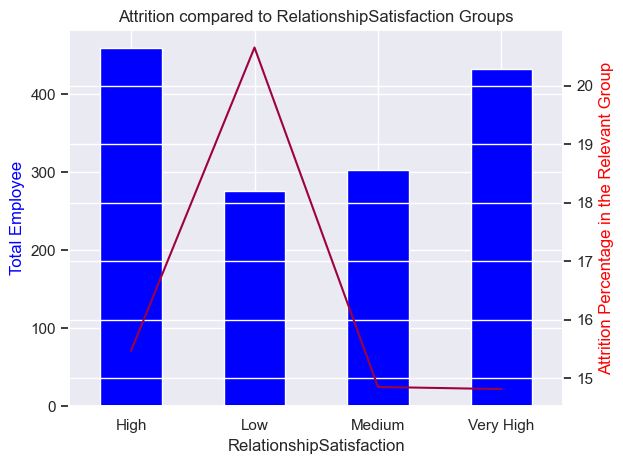

In [90]:

# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')

In [91]:
# Relationship & Attrition Table
table_df(x = 'StockOptionLevel')

,StockOptionLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,631,154,24.405705,64.978903
1,1,596,56,9.395973,23.628692
2,2,158,12,7.594937,5.063291
3,3,85,15,17.647059,6.329114


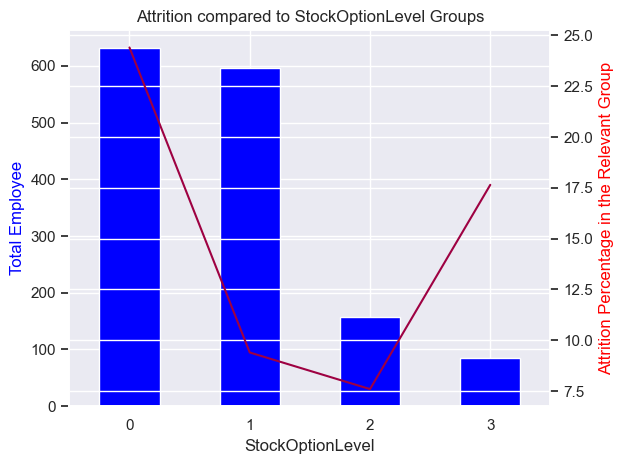

In [92]:
# Attrition compared to Stock Option Level Graph
graph_df(x = 'StockOptionLevel')

In [93]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [94]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


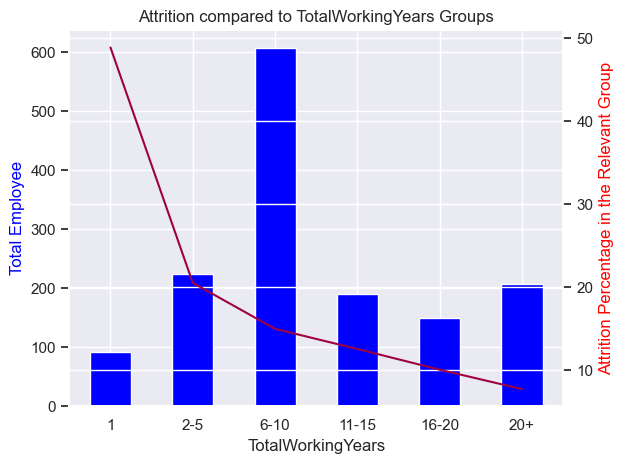

In [95]:
graph_df(x = 'TotalWorkingYears')

In [96]:
# Training Times Last Year & Attrition Table
table_df(x = 'TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


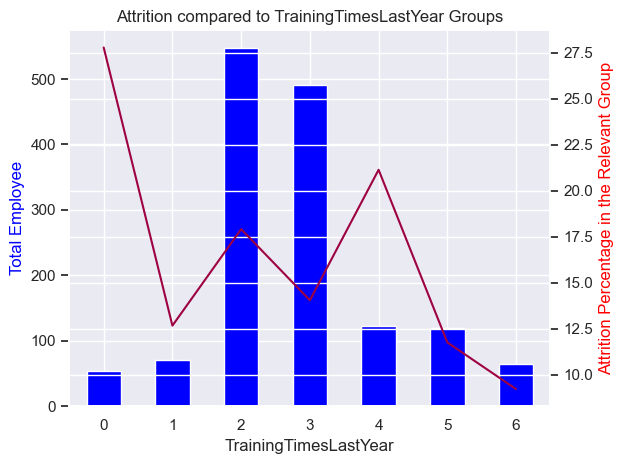

In [97]:

# Attrition compared to Training Times Last Year Graph
graph_df(x = 'TrainingTimesLastYear')

In [98]:
# Labeling Work Life Balance Groups
table_df(x = 'WorkLifeBalance')
df2['WorkLifeBalance'] = df2['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})

In [99]:
# Work Life Balance & Attrition Table
table_df(x = 'WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bad,80,25,31.250000,10.548523
1,Best,153,27,17.647059,11.392405
2,Better,893,127,14.221725,53.586498
3,Good,344,58,16.860465,24.472574


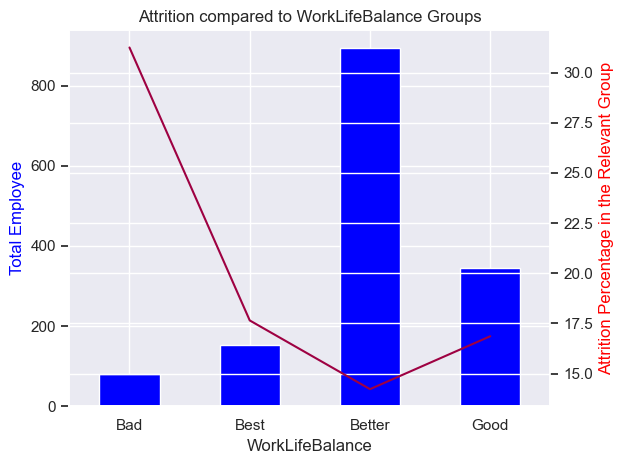

In [100]:
# Attrition compared to Work Life Balance Graph
graph_df(x = 'WorkLifeBalance')

In [101]:
# Labeling Years at Company Groups
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df2['YearsAtCompany'] = pd.cut(df2['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

In [102]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


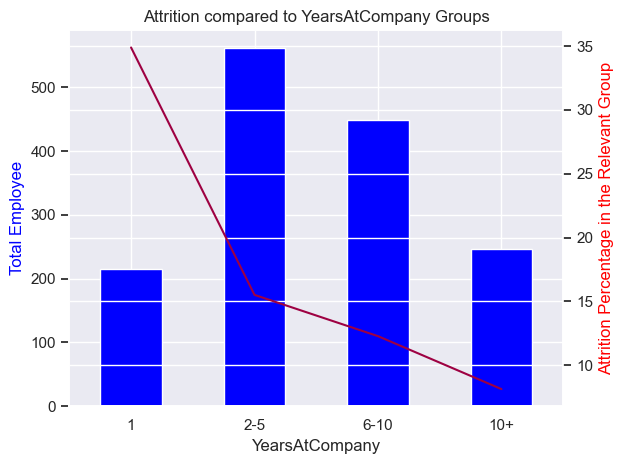

In [103]:
# Years at Company & Attrition Graph 
graph_df(x = 'YearsAtCompany')

In [104]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [105]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


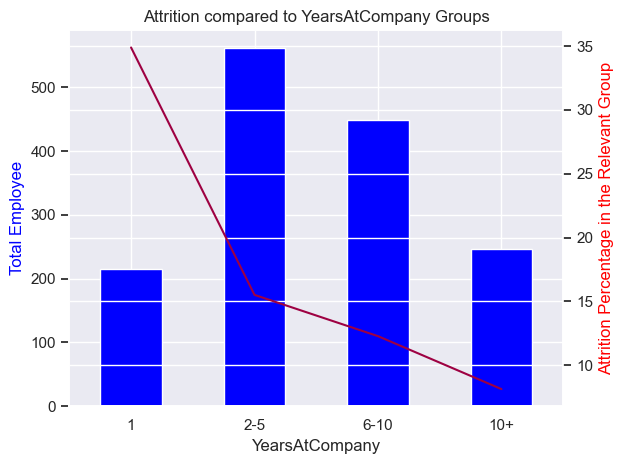

In [106]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

In [107]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df2['YearsSinceLastPromotion'] = pd.cut(df2['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [108]:
# Years Since Last Promotion & Attrition Table
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


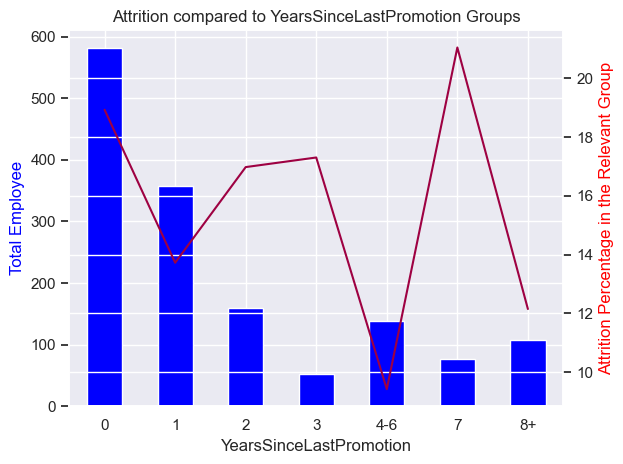

In [109]:
# Years Since Last Promotion & Attrition Graph
graph_df(x = 'YearsSinceLastPromotion')

In [110]:
# Labeling Years with Current Manager Groups
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df2['YearsWithCurrManager'] = pd.cut(df2['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

In [111]:
# Years with Current Manager & Attrition Table
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


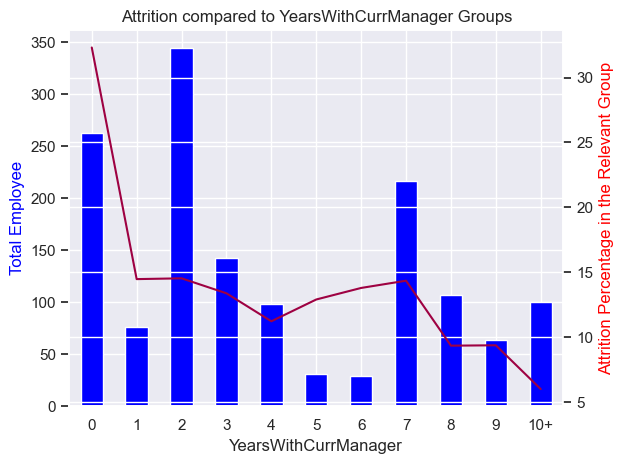

In [112]:
# Years with Current Manager & Attrition Graph
graph_df(x = 'YearsWithCurrManager')

<AxesSubplot:>

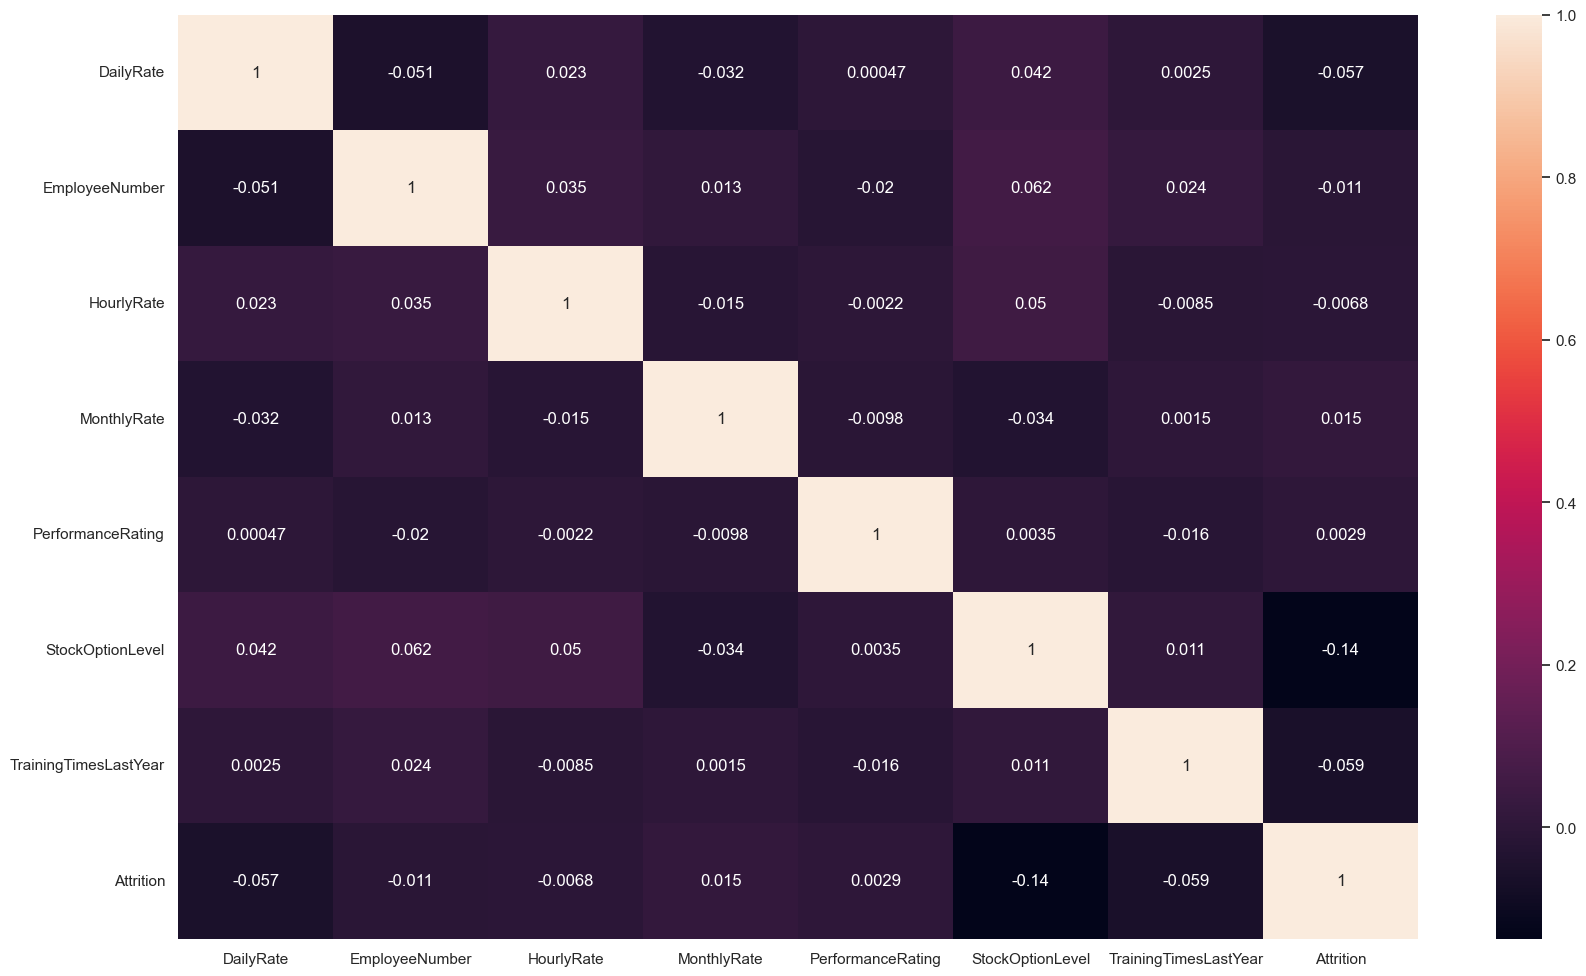

In [113]:
corr_matrix = df2.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

In [114]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


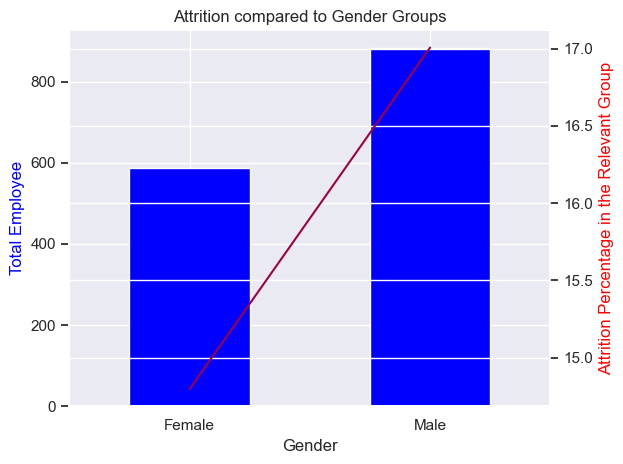

In [115]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

In [116]:
# Assign female and  male into variables
female = df2[df2['Gender'] == 'Female']
male = df2[df2['Gender'] == 'Male']

# Find the mean for female and male employees attrition
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()
print ('Female attrition mean: {}'.format(female_attrition_mean))
print ('Male attrition mean: {}'.format(male_attrition_mean))

# Find the difference of female and male employees attrition
diff_mean = male_attrition_mean - female_attrition_mean
print ('Difference of mean between male and female employees attrition: {}'.format(diff_mean))

Female attrition mean: 0.14795918367346939
Male attrition mean: 0.17006802721088435
Difference of mean between male and female employees attrition: 0.022108843537414963


In [117]:
# Compute z-score
male_attrition = np.sum(male['Attrition'])
female_attrition = np.sum(female['Attrition'])
male_ln = len(male)
female_ln = len(female)            
phat = (male_attrition + female_attrition) / (male_ln + female_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print ('z score:{}'.format(z))

z score:1.1292547809155016


In [118]:

# Compute p-value
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:0.2587903704911598


In [119]:

# Compute margin of error
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.03837338930564671


In [120]:
# Compute confidence interval
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-0.01626455  0.06048223]
